In [5]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r'..\..\datasets\nfs_cleaned.csv', encoding='latin-1')
pd.set_option('display.max_columns', None)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065547 entries, 0 to 2065546
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   nf_numero         2065547 non-null  int64  
 1   nf_item           2065547 non-null  int64  
 2   nf_datahora       2065547 non-null  object 
 3   nf_timestamp      2065547 non-null  int64  
 4   nf_valor_total    2065547 non-null  float64
 5   emit_nome         2065547 non-null  object 
 6   emit_cnpj         2065547 non-null  int64  
 7   emit_bairro       2065547 non-null  object 
 8   emit_municipio    2065547 non-null  object 
 9   emit_cep          2065547 non-null  int64  
 10  emit_lat          2065547 non-null  float64
 11  emit_long         2065547 non-null  float64
 12  prod_desc         2065547 non-null  object 
 13  prod_ncm          2065547 non-null  int64  
 14  prod_cfop         2065547 non-null  int64  
 15  prod_quant        2065547 non-null  float64
 16  

<Axes: >

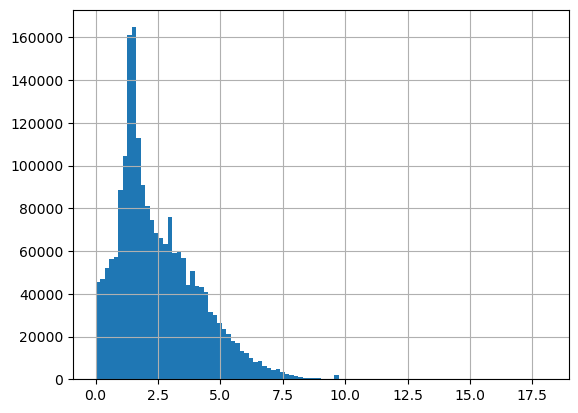

In [10]:
df['Log_Value'] = np.log(df['prod_valor_unit'] + 1)
df['Log_Value'].hist(bins=100)

In [10]:
most_common_ncm = df['prod_ncm'].value_counts().idxmax()
most_common_ncm

30049099

In [11]:
df = df[df['prod_ncm'] == most_common_ncm]
df.head(5)

,nf_numero,nf_item,nf_datahora,nf_timestamp,nf_valor_total,emit_nome,emit_cnpj,emit_bairro,emit_municipio,emit_cep,emit_lat,emit_long,prod_desc,prod_ncm,prod_cfop,prod_quant,prod_unid,prod_valor_unit,prod_valor_total
494,3332,7,2016-04-13 08:52:33,1460537553,1415.34,dimedont distr. de medic. e equipamentos ltda,4064641000160,centro,cajazeiras,58900000,-6.889785,-38.557039,citalopram 20mg comp,30049099,5403,240.0,und,0.48,115.20
495,3332,8,2016-04-13 08:52:33,1460537553,1415.34,dimedont distr. de medic. e equipamentos ltda,4064641000160,centro,cajazeiras,58900000,-6.889785,-38.557039,citalopram 20mg comp,30049099,5403,168.0,und,0.48,80.64
512,2099,16,2016-08-25 08:41:21,1472114481,4490.26,biomed dist. hosp. e lab. nossa senhora da con...,7936090000176,remedios,cajazeiras,58900000,-6.889785,-38.557039,"soro fisiologico 0,9p 100ml cx c/80amp",30049099,5102,158.0,und,2.55,402.90
666,8361,1,2016-12-28 10:02:53,1482919373,8000.70,dimedont distr. de medic. e equipamentos ltda,4064641000160,centro,cajazeiras,58900000,-6.889785,-38.557039,soro fisiologico 500ml c/24,30049099,5403,70.0,cx,61.00,4270.00
667,8361,2,2016-12-28 10:02:53,1482919373,8000.70,dimedont distr. de medic. e equipamentos ltda,4064641000160,centro,cajazeiras,58900000,-6.889785,-38.557039,soro glicosado 5p 500ml,30049099,5403,200.0,fr,3.40,680.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76457 entries, 494 to 2065414
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nf_numero         76457 non-null  int64  
 1   nf_item           76457 non-null  int64  
 2   nf_datahora       76457 non-null  object 
 3   nf_timestamp      76457 non-null  int64  
 4   nf_valor_total    76457 non-null  float64
 5   emit_nome         76457 non-null  object 
 6   emit_cnpj         76457 non-null  int64  
 7   emit_bairro       76457 non-null  object 
 8   emit_municipio    76457 non-null  object 
 9   emit_cep          76457 non-null  int64  
 10  emit_lat          76457 non-null  float64
 11  emit_long         76457 non-null  float64
 12  prod_desc         76457 non-null  object 
 13  prod_ncm          76457 non-null  int64  
 14  prod_cfop         76457 non-null  int64  
 15  prod_quant        76457 non-null  float64
 16  prod_unid         76457 non-null  ob

In [13]:
df.to_csv(r'..\..\datasets\nfs_cleaned_most_common_ncm.csv', index=False)

In [14]:
df.describe()

,nf_numero,nf_item,nf_timestamp,nf_valor_total,emit_cnpj,emit_cep,emit_lat,emit_long,prod_ncm,prod_cfop,prod_quant,prod_valor_unit,prod_valor_total
count,7.645700e+04,76457.000000,7.645700e+04,7.645700e+04,7.645700e+04,7.645700e+04,76457.000000,76457.000000,76457.0,76457.000000,76457.000000,76457.000000,76457.000000
mean,2.734062e+04,41.747544,1.468248e+09,1.426413e+04,1.322386e+13,5.651952e+07,-7.475516,-37.564983,30049099.0,5587.104176,555.414820,39.723816,635.570436
std,9.594183e+04,74.003819,8.712570e+06,2.916256e+04,1.372179e+13,9.106769e+06,3.383049,4.309450,0.0,713.477127,4152.328527,144.486034,5416.142092
min,1.000000e+00,1.000000,1.451866e+09,0.000000e+00,8.582200e+10,0.000000e+00,-31.287471,-63.852061,30049099.0,1102.000000,0.250000,0.000000,0.000000
25%,3.880000e+02,5.000000,1.460989e+09,3.185350e+03,6.007901e+12,5.808840e+07,-7.224674,-37.746967,30049099.0,5403.000000,2.000000,2.420000,51.760000
50%,3.878000e+03,14.000000,1.468195e+09,7.478480e+03,1.044525e+13,5.841037e+07,-7.224674,-35.877129,30049099.0,5405.000000,8.000000,13.800000,144.000000
75%,3.166700e+04,40.000000,1.475494e+09,1.568716e+04,1.521856e+13,5.871000e+07,-6.851398,-35.491558,30049099.0,5929.000000,150.000000,43.980000,400.000000
max,2.276942e+06,691.000000,1.483214e+09,3.198733e+06,7.385659e+13,9.974000e+07,2.820848,-34.835161,30049099.0,6949.000000,300000.000000,11661.170000,616920.000000
